In [106]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [107]:
os.listdir("data")

['.DS_Store', 'train', 'validation']

In [108]:
train_path = 'data/train'
validation_path = 'data/validation'

In [109]:
img = train_path+'/pedestrian'+'/pic_073.jpg'
imread(img).shape

(168, 300, 3)

Image shapes: 168x300 RGB

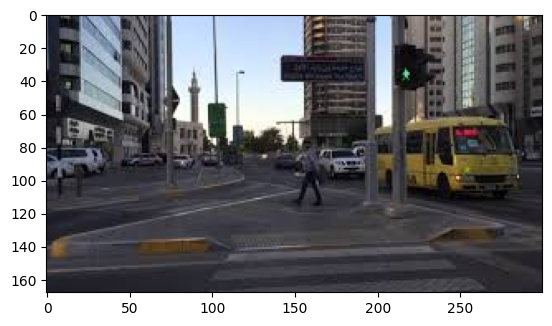

In [110]:
plt.imshow(imread(img))

In [111]:
len(os.listdir(train_path+'/pedestrian'))

631

Train length = 631 + 631 = 1262
<br>
Validation length = 177 + 177 = 354
<hr>
<br>
Total: 1618

In [112]:
dim1 = []
dim2 = []

for image_name in os.listdir(validation_path+'/pedestrian'):
    img = imread(validation_path+'/pedestrian/'+image_name)
    d1, d2, colors = img.shape

    dim1.append(d1)
    dim2.append(d2)

In [113]:
dim1[0:10]

[168, 169, 194, 150, 168, 195, 168, 168, 168, 195]

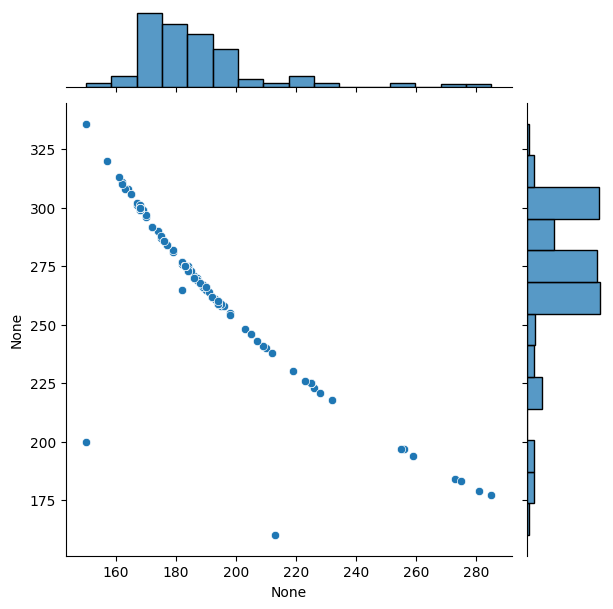

In [114]:
sns.jointplot(x=dim1,y=dim2)

In [115]:
np.mean(dim1)

187.1864406779661

In [116]:
np.mean(dim2)

271.1412429378531

Define shape for standardization before training

In [117]:
image_shape = (200,200,3)

<h3>Data Preprocessing

In [118]:
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

In [120]:
img = train_path+'/pedestrian'+'/pic_073.jpg'
imread(img).max()

255

In [121]:
image_gen=ImageDataGenerator(rescale=1/255,shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

In [122]:
image_gen.flow_from_directory(train_path)

Found 1262 images belonging to 2 classes.


In [123]:
image_gen.flow_from_directory(validation_path)

Found 354 images belonging to 2 classes.


In [124]:
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras._tf_keras.keras.callbacks import EarlyStopping

In [126]:
from torch import conv2d


model = Sequential()

model.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape= image_shape, activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 64, kernel_size=(3,3), input_shape= image_shape, activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Conv2D(filters= 64, kernel_size=(3,3), input_shape= image_shape, activation= 'relu'))
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten())

model.add(Dense(units= 128, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units= 1, activation= 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

/Users/fege/Documents/python_env2/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,390,145 (16.75 MB)

 Trainable params: 4,390,145 (16.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor= 'val_loss', patience= 3)